# This script generates a graph with the statistics of the most used programming languages on GitHub itself.

## Author: Wellerson Prenholato

# Importa bibliotecas

In [190]:
#Importação da bibliotecas
import pandas as pd
import numpy as np 
from github import Github
from functools import reduce
import math
from operator import itemgetter, attrgetter
from matplotlib import pyplot as plt
from dotenv import load_dotenv
import os
# import getpass

In [191]:
# g = Github('WellersonPrenholato', getpass.getpass('Senha:'))

# Token para acessar o GitHub

In [192]:
# Carregue as variáveis de ambiente do arquivo .env
load_dotenv()

token_ssh = os.getenv('TOKEN_SSH')

In [193]:
# Crie uma instância do Github com o token
g = Github(token_ssh)

# Algoritmo

In [194]:
usedLanguages={}
for repo in g.get_user().get_repos():
    repoLangs = repo.get_languages()
    for lang in repoLangs:
        if lang in usedLanguages:
            usedLanguages[lang] += repoLangs[lang]
        else:
            usedLanguages[lang] = repoLangs[lang]
# print(usedLanguages)

In [195]:
# total = reduce(lambda x, value:x + value, usedLanguages.values(), 0)
# total

In [196]:
conjLinguagens = [];
pesoLinguagens = [];
for linguagem, peso in zip(list(usedLanguages.keys()), list(usedLanguages.values())):
    conjLinguagens.append(linguagem)
    pesoLinguagens.append(peso)

In [197]:
armazena_data = {'Linguagens': conjLinguagens, 'Peso': pesoLinguagens};

In [198]:
#Transforma o conjunto de listas em um dataframe
data = pd.DataFrame(armazena_data)

In [199]:
#Gera um arquivo csv com todas linguagens utilizadas
data.to_csv('Linguagens.csv', encoding= 'ISO-8859-1', sep= ';', index=False)
data.sort_values(by=['Peso'], ascending=False, inplace=True)

In [200]:
#Lista com todas as linguagens que desejamos remover
listRemove = ['HTML', 'CSS', 'Jupyter Notebook', 'PHP'];
for remove in listRemove:
    data = data.drop(data[(data.Linguagens == remove)].index)

In [201]:
#Gera o arquivo csv com todas linguages utilizadas no próprio github
data.to_csv('Linguagens.csv', encoding= 'ISO-8859-1', sep= ';', index=False)
data = pd.read_csv('Linguagens.csv', encoding='ISO-8859-1', sep=';')

In [202]:
# Seleciona um número x de linguagens
qtdLanguages = 6
indices=[x for x in data.index if (x >= qtdLanguages)]
data.drop(indices, inplace=True)

In [203]:
data.head(20)

,Linguagens,Peso
0,Python,2302624
1,C,1930323
2,JavaScript,1826549
3,TypeScript,852044
4,Java,500076
5,C++,291871


In [204]:
total = data['Peso'].sum()
# total = reduce(lambda x, value: x + value, data['Peso'], 0)
total

7703487

In [205]:
data['Peso'] = pd.to_numeric(data['Peso'], downcast='float')

In [206]:
data.dtypes

Linguagens     object
Peso          float32
dtype: object

In [207]:
for index, row in data.iterrows():
    data.at[index, 'Peso'] /= total
    data.at[index, 'Peso'] = round(data.at[index, 'Peso'] * 100, 3)
#     print(data.at[index, 'Peso'])

C:\Users\welle\AppData\Local\Temp\ipykernel_152128\2208118469.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.29890671588074336' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  data.at[index, 'Peso'] /= total


In [208]:
#Verificação da porcentagem total
data['Peso'].sum()

100.001

In [209]:
data.head(10)

,Linguagens,Peso
0,Python,29.891
1,C,25.058
2,JavaScript,23.711
3,TypeScript,11.060
4,Java,6.492
5,C++,3.789


# Gera gráfico

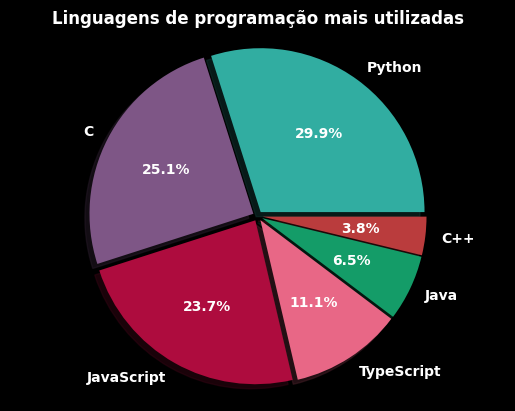

In [210]:
# Dados das vendas e rótulos das linguagens
vendas = data['Peso']
labels = data['Linguagens']

# Configura o estilo escuro
plt.style.use('dark_background')

# Define as cores para as fatias
colors = ['#31ada1', '#7E5686', '#ae0c3e', '#e86786', '#149c68', '#BA3C3D']

# Define a separação entre as partes e o destaque de uma parte
explode = (0.03, 0.03, 0.03, 0.03, 0.03, 0.03)

# Configura o gráfico de pizza com cores personalizadas
plt.pie(vendas, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode, colors=colors, textprops={'fontweight': 'bold', 'color': 'white'})

# Define o círculo como a forma do gráfico
plt.axis('equal')
plt.title('Linguagens de programação mais utilizadas', fontweight='bold')
plt.savefig('linguages-statistics.png')
plt.show()